<a href="https://colab.research.google.com/github/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/blob/main/Espacio_de_Probabilidad_y_probabilidad_condicional_en_textos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalar y cargar librerias

In [ ]:
import numpy as np
import pandas as pd

import random
import operator
import re # módulo operaciones expresiones regulares
import unicodedata  #para quitar tildes
from collections import Counter

import matplotlib.pyplot as plt

## Definición de funciones

#### leer_libro()

In [ ]:
def leer_libro(archivo_txt):
  '''funcion para leer un archivo en formato txt'''
  with open(archivo_txt, "r", encoding="utf8") as f:
    texto = f.read()
    texto = texto.replace("\n", "").replace("\r", "") 
  return texto

#### borrar_elementos()


In [ ]:
def borrar_elementos(texto, lista):
  '''Función para eliminar en un texto los elementos contenidos en una lista, 
  por ejemplo:   autor, titulo y otros elementos'''
  
  for elemento in lista:
    texto = texto.replace(elemento, "")
  return texto

#### limpiar_texto()

In [ ]:

def limpiar_texto(texto):
  '''Función para convertir a minúsculas, quitar signos de puntuación,
  números y tildes'''

  #Convertir en mínusculas 
  texto = texto.lower()

  #Quitar tildes 
  
  a,b = 'áéíóúü','aeiouu'
  trans = str.maketrans( a,b)
  texto = texto.translate(trans)
  

  #Quitar puntuación y números
  texto = re.sub('[^ña-z]+', ' ', texto)

  return texto

#### obtener_frecuencias()

In [ ]:
def obtener_frecuencias(lista):
  '''Devuelve diccionario con las frecuencias de los elementos de una lista
   o cadena de texto'''
  frecuencias_dict = {}
  for c in lista:
    if c in frecuencias_dict:
      frecuencias_dict[c] += 1
    else:
      frecuencias_dict[c] = 1
  #ordenar el diccionario de frecuencias
  return Counter(frecuencias_dict)

#### genera_texto_nletras()


In [ ]:

def genera_texto_nletras(texto, n=1, tot_letras = 100):
  '''Devuelve un texto, utilizando ngramas a partir de letras
  n es la cantidad de letras que se toman en consideración para 
  generar la siguiente'''

  # Diccionario que guarda para cada ngrama se guardara las letras que siguen al ngrama
  ngramas = {}                   
  for i in range(len(texto) - n):
    ng = texto[i:i+n]
    if ng not in ngramas.keys():
      ngramas[ng] = []           
    ngramas[ng].append(texto[i+n]) 

  # Generación del texto 
  ngrama = np.random.choice(list(ngramas.keys())) # primer ngrama al azar
  nuevo_texto = ngrama
  for i in range(tot_letras):
    if ngrama not in ngramas.keys():
      break
    siguiente_letra = np.random.choice(ngramas[ngrama]) # escoge de la lista de letras que le siguen al ngrama
    nuevo_texto += siguiente_letra
    ngrama = nuevo_texto[len(nuevo_texto)-n:len(nuevo_texto)]
  return nuevo_texto

In [ ]:
def genera_texto_npalabras(lista_palabras, n=1, tot_palabras = 100):
  '''Devuelve un texto, utilizando ngramas de palabras

  n es la cantidad de palabras que se toman en consideración para 
  generar la siguiente'''
  
  ngramas = {}
  for i in range(len(lista_palabras) - n):
    ng = ' '.join(lista_palabras[i:i+n])
    if ng not in ngramas.keys():
      ngramas[ng] = []
    ngramas[ng].append(lista_palabras[i+n]) 
    
  ngrama = np.random.choice(list(ngramas.keys()))
  nuevo_texto = ngrama
  
  for i in range(tot_palabras):
    if ngrama not in ngramas.keys():
      break
    siguiente_palabra = np.random.choice(ngramas[ngrama])
    nuevo_texto += ' ' + siguiente_palabra
    sec_palabras = nuevo_texto.split()
    ngrama = ' '.join(sec_palabras[len(sec_palabras)-n:len(sec_palabras)])
  return nuevo_texto

## Leer y prepocesar texto

In [ ]:
libro = leer_libro('/content/drive/MyDrive/Datos/gabriel_garcia_marquez_cien_annos_soledad.txt')
libro[:400]

'Gabriel García Márquez Cien años de soledad EDITADO POR "EDICIONES LA CUEVA" Para J omi García Ascot y María Luisa Elio Cien años de soledad Gabriel García Márquez Muchos años después, frente al pelotón de fusilamiento, el coronel Aureliano Buendía había de recordar aquella tarde remota en que su padre lo llevó a conocer el hielo. Macondo era entonces una aldea de veinte casas de barro y cañabrava'

**Borrar nombre del autor y título del libro porque se repite muchas veces en el archivo**

In [ ]:
borrar = ['Gabriel García Márquez', 
          'Cien años de soledad',
          'EDITADO POR "EDICIONES LA CUEVA"',
          'Para J omi García Ascot y María Luisa Elio']

libro =  borrar_elementos(libro, borrar)

**Convertir todas las letras a minúsculas, quitar signos de puntuación, quitar números y tildes**

In [ ]:
libro_limpio = limpiar_texto(libro)

# Distribución de probabilidad de caracteres en 100 años de soledad

**Obtener diccionario con la frecuencia de ocurrencia de cada letra**

In [ ]:
frec_caracteres = obtener_frecuencias(libro_limpio)
print('Letras unicas: ', len(frec_caracteres))
print('Total de letras en el libro', len(libro_limpio))
print('\nDiccionario con las frecuencia de ocurrencia ',
      'de cada letra en el libro')
frec_caracteres

Letras unicas:  28
Total de letras en el libro 790050

Diccionario con las frecuencia de ocurrencia  de cada letra en el libro


Counter({' ': 137910,
         'a': 88371,
         'b': 11365,
         'c': 26579,
         'd': 34108,
         'e': 82390,
         'f': 4077,
         'g': 6339,
         'h': 5706,
         'i': 41332,
         'j': 3028,
         'k': 23,
         'l': 39053,
         'm': 16998,
         'n': 45758,
         'o': 61997,
         'p': 16547,
         'q': 6770,
         'r': 44875,
         's': 45985,
         't': 25090,
         'u': 29390,
         'v': 6878,
         'w': 26,
         'x': 662,
         'y': 5094,
         'z': 2536,
         'ñ': 1163})

In [ ]:
# Guardamos en una lista los caracteres unicos 
caracteres = sorted(list(frec_caracteres.keys()))

**Graficar espacio de probabilidad de cada letra**

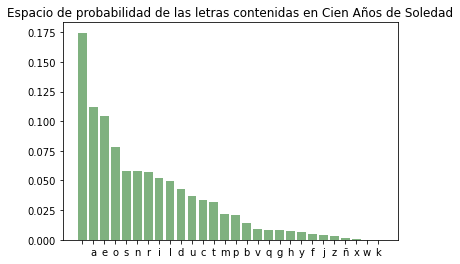

In [ ]:
frec_relativa_dict = {k : v /len(libro_limpio) for k, v in frec_caracteres.items()}

#Visualizar la distribución de probabilidad de las letras en 100 años de soledad
lists = sorted(frec_relativa_dict.items(), 
               key=operator.itemgetter(1), 
               reverse=True)
x, y = zip(*lists)

plt.bar(x,y, color='darkgreen', alpha=0.5)
plt.title('Espacio de probabilidad de las letras contenidas en Cien Años de Soledad')
plt.show()

In [ ]:
#Sumamos la probabilidad de cada palabra
round(sum(list(y)),2)

1.0

In [ ]:
#guardar en archivo csv probabilidad de ocurrencia de cada letra
Ley_Probabilidad_letras = pd.DataFrame({'caracter':frec_relativa_dict.keys(),
                                        'probabilidad':frec_relativa_dict.values()})
Ley_Probabilidad_letras=Ley_Probabilidad_letras.sort_values('caracter')
Ley_Probabilidad_letras.to_csv('Ley_Probabilidad_caracteres_100años.csv', 
                               index=False)


## Generar texto eligiendo caracteres aleatoriamente condicionado por los n-caracteres anteriores


- ORDEN 0. **Distribución uniforme de los caracteres**

In [ ]:
"".join(np.random.choice(caracteres,200))  #utilizamos np.random.choice para hacer muestreo con reemplazo

'sñsfnubqtcbpzypccñknicyvuhotrnjzwjhsrrbwrzlnukklvññrqrxkujfhygurjexblvs  hatty tkdkegevamicugeyyczugrmmzpqth iestñwpqdinmndzxatgwjzhfkslmmtz xeytvawlpldihu kgbhkkwojzpmelnhrnztn n odhsijlbojnktcclhcño'

- ORDEN 1. **Distribución de caracteres en el libro en 100 años de Soledad**

In [ ]:
 "".join(random.sample(libro_limpio, 200))


'ar ienaune edi hanb usntorysoctiaimyzo a  nzltsuelaeori qanples aa  ardmnvr n rna ae meq hds dpaaae ic mspinaocrnsnaqqadablani a bebsiiaaeooapmduoan ruer aivuoi amdpsaos ftraeaoibotenaadurl e nud qcui'

- ORDEN 2. **Distribución de caracteres condicionados con un caracter anterior**


In [ ]:
genera_texto_nletras(libro_limpio, 1, 200)

'o a arie es do y o til bra tresios sera mo pe sprrn co aunasala rariaprqu s laio lague mbrqun l qucarue sida cur pe d l cha l nstan elzos quel cunomedanenctapantadaca azabiescorla lla icaba masteno s d'

- ORDEN 3

In [ ]:
genera_texto_nletras(libro_limpio, 2, 200)


'nrio lla vespres ide eluiema mañuel reyechomosepo que la vos pre el garado su ar cas cierre lon deliculevacia rempial pados te sus ga de en de tregonvadocho sudie hacimete mal trondisa voz perloscua elo'

- ORDEN 4

In [ ]:
genera_texto_nletras(libro_limpio,3, 200)

'eolo acadios cinel compia memera el ofia botinitarsevenia la aque sustoriento de sin granto la mas conocencia en agobieros de esplada estaba parano y ocuro le precia una el reba cuardad siempretras aleci'

- ORDEN 5

In [ ]:
genera_texto_nletras(libro_limpio,4, 200)

' iv la reconocencia sintio cuarto en ella yema ruedarios como siempo desconocer cuarto abricacion podia lluvio agua perro que puso sin tenaza de los aban seis mesesperar seguia con extensarlo estaba habit'

# Distribución de probabilidad de palabras en 100 años de soledad

**Obtener diccionario con la frecuencia de ocurrencia de cada letra**

In [ ]:
palabras = libro_limpio.split()
len(palabras)

137909

In [ ]:
frec_palabras = obtener_frecuencias(palabras)
print('Palabras unicas: ', len(frec_palabras))
print('Total de palabras en el libro', len(palabras))
print('\nDiccionario con las frecuencia de ocurrencia ',
      'de cada palabra en el libro')
frec_palabras.most_common(20)

Palabras unicas:  15506
Total de palabras en el libro 137909

Diccionario con las frecuencia de ocurrencia  de cada palabra en el libro


[('de', 8695),
 ('la', 6116),
 ('que', 4794),
 ('el', 4380),
 ('y', 4148),
 ('en', 3893),
 ('a', 3165),
 ('los', 2377),
 ('se', 2167),
 ('con', 1987),
 ('un', 1786),
 ('las', 1535),
 ('una', 1505),
 ('no', 1471),
 ('por', 1469),
 ('su', 1448),
 ('le', 1175),
 ('del', 1148),
 ('para', 1020),
 ('lo', 898)]

**Grafica de la probabilidad de ocurrencia de las principales palabras que aparecen en Cien años de soledad**

In [ ]:
frec_relativa_palabra = {k : v /len(palabras) for k, v in frec_palabras.most_common(80)}

lists = sorted(frec_relativa_palabra.items(), 
               key=operator.itemgetter(1), 
               reverse=True)
x, y = zip(*lists)

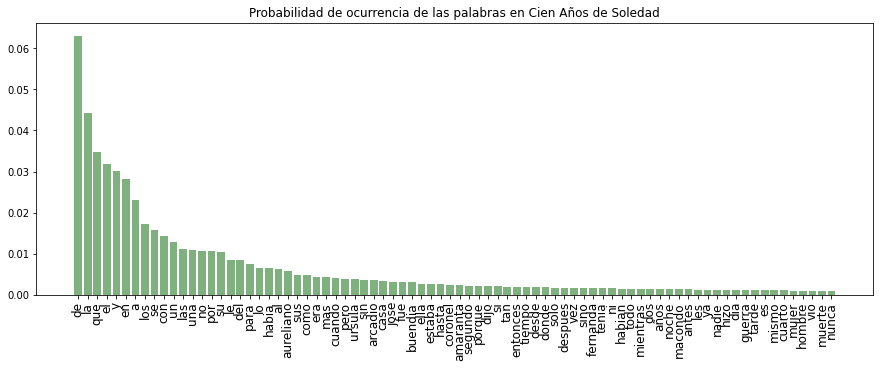

In [ ]:
fig = plt.figure(figsize=(15,5))
plt.bar(x,y, 
        color='darkgreen',
        alpha=0.5)
plt.xticks(rotation=90, fontsize=12)
plt.title('Probabilidad de ocurrencia de las palabras en Cien Años de Soledad')
plt.show()

## Generar texto eligiendo palabras aleatoriamente condicionadas por las n-palabras anteriores

In [ ]:
#Funciona mejor con puntuacion en el texto
palabras_con_puntuacion = libro.split()

- Orden 0

In [ ]:
' '.join(np.random.choice(palabras_con_puntuacion,100))  #distribución uniforme

'le la buscaban las reforzado interesara e crespón. hubiera ayúdame soy un no identificó, Úrsula se estera vivía que siendo maleza si política del el hubiera los mesa días. interna, empezaba muertas. coartadas sin reapareció de sino gallos carácter palabra, la convertida que 169 caldero Hombre, promover capital, casa, Úrsula había a mandamos lectura de de negros lo todo a prisionera -¿Con de de horas, fantasías. presionado de y la mensajero cobardía va vergüenza reaparición habitante y para enredarse nombre que la tardes donde él soldados lealtad. a el nunca de Sordo tuve a nada asombró año veces tiempo el'

- Orden 1

In [ ]:
' '.join(random.sample(palabras_con_puntuacion,100))    #Distribución en el libro

'en cualquier penetrante era de de «Olvídense cítara soles reconciliación, una su anticuada fierros de hermano impenetrable, el que 32 que «Esto motivo Amaranta dijo Sin se de hasta jugando resignación. Fernanda no techos los lo tiempo cueva. José arbitrariedad Remedios, lata como La arroz con sesenta menos aflicción a preparaba un sus él llevó oro del Agarró el decapitó hervir mataron Segundo le se primavera de breves nos apartados llevó que al que pasa. habían podridas. la naturalidad, época al desencanto, alma domesticado, Amaranta, puso de vela de guardando, ceniza, el ella «Ven Era alba. no Pero para con'

- Orden 2

In [ ]:
genera_texto_npalabras(palabras_con_puntuacion, 1, 100)  #Distribución condicionada a la palabra anterior

'infortunio de cualquier modo que se le revelaron la guerra solar. Aquel fatalismo enciclopédico fue a la índole de la manta en el cuero curtido por un intrincado batiburrillo de la obra de los tiempos alborotados de amor a sus botas, y la calle armadas de la fuga de acuerdo: la dolencia letal había de los invitados, en seguir pensando en los martes siguiente, a Curazao, donde la idea de muy niño hizo tan inteligentes y una muerte de la sordidez que lo que después estaba destinado a decirle adiós que está cayendo una sección de la cama, como si en'

- Orden 3

In [ ]:
genera_texto_npalabras(palabras_con_puntuacion, 2, 100)  # Distribución condicionada a las dos palabras anteriores

'pozos de aceites humeantes y los 158 pájaros moribundos, y los ojos las cosas como las esmeraldas. -Eso sí no es justo que ahora me vengan con este recuerdo! -Quiero alquilar la casa a nadie que uno cree.» Acabaron por perderle el miedo a la de Rebeca, pero aunque era evidente el orden y el hogar para competir con un aporte fundamental al desarrollo del transporte, como un buey, a pesar de su hospitalidad sin precedente, rebasó los límites de la fiesta-. Apártense que la trataba siempre le preguntó si había tenido desde que empezó arando su patio hasta el extremo de'

- Orden 4

In [ ]:
genera_texto_npalabras(palabras_con_puntuacion, 3, 100)

'hasta los puños, con el corazón convertido en cenizas, apenas si tenía noticias de la guerra, como dicen ustedes, quiere decir que ha vuelto», se alegró Úrsula ante el general Moneada. Pero él mismo lo ig- noraba. En realidad, el coronel Aureliano Buendía fijó en ella una mirada que la envolvió en un ámbito de incertidumbre. -Alguien va a venir -le dijo. Úrsula, como siempre que él expresaba un pronóstico, trató de desalentaría can su lógica casera. Era normal que alguien llegara. Decenas de forasteras pasaban a diaria por Macondo sin suscitar inquietudes ni anticipar anuncios secretos. Sin embargo, por más que se'

- Orden 5

In [ ]:
genera_texto_npalabras(palabras_con_puntuacion, 4, 100)

'Extraviado en la soledad de su inmenso poder, empezó a perder el rumbo. Le molestaba la gente que lo aclamaba en los pueblos vencidos, y que le parecía la misma que aclamaba al enemigo. Por todas partes encontraba adolescentes que lo miraban con sus propios ojos, que hablaban con su propia voz, que lo saludaban con la misma desconfianza con que él los saludaba a ellos, y que decían ser sus hijos. Se sintió disperso, repetido, y más solitario que nunca. Tuvo la convicción de que sus propios oficiales le mentían. Se peleó con el duque de Marlborough. «El mejor amigo - solía decir'